In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bru = pd.read_csv("Paul_Brussels.csv", sep=";")
paris = pd.read_csv("Paul_Paris.csv", sep=";")

# Basic statistics

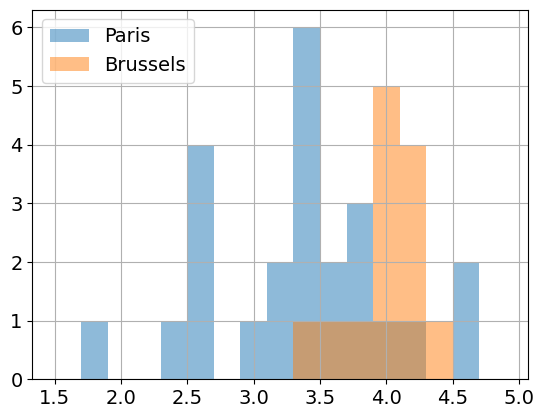

In [4]:
bin_edges = np.arange(1.5, 5.1, 0.2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

plt.hist(paris["Evaluation"], bins=bin_edges, alpha=0.5, label="Paris")
plt.hist(bru["Evaluation"], bins=bin_edges, alpha=0.5, label="Brussels")

plt.legend(fontsize=14, loc="upper left")
plt.show()

<ipython-input-6-be9494336934>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ville', y='Evaluation', data=parisBru, palette={'Paris':'#1f77b4', 'Brussels':'#ff7f0e'}, boxprops=dict(alpha=0.5))


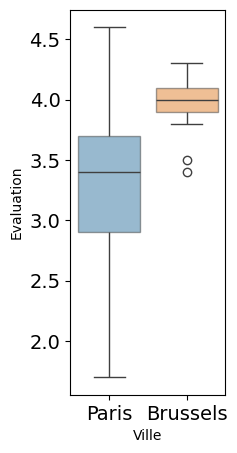

In [6]:
# Add un column "Ville"
bru['Ville'] = 'Brussels'
paris['Ville'] = 'Paris'

# Concatinate 2 dataframes
parisBru = pd.concat([paris[['Evaluation', 'Ville']], bru[['Evaluation', 'Ville']]], ignore_index=True)

plt.figure(figsize=(2, 5))
sns.boxplot(x='Ville', y='Evaluation', data=parisBru, palette={'Paris':'#1f77b4', 'Brussels':'#ff7f0e'}, boxprops=dict(alpha=0.5))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

# Verify data

# Verify normality

In [7]:
from scipy.stats import shapiro
stat_b, p_b = shapiro(bru["Evaluation"])
p_b

np.float64(0.15383666835465148)

In [8]:
stat_p, p_p = shapiro(paris['Evaluation'])
p_p

np.float64(0.7124108594708701)

# Verify homoscedasticity of variance (Levene)

In [9]:
from scipy.stats import levene

stat, p = levene(bru['Evaluation'], paris['Evaluation'])
print(f"p_value of test Levene={p}")

if p > 0.05:
    print("Homoscedasticity confirmed")
else:
    print("Homoscedasticity not confirmed（ ->Use Welch's t-test）")

p_value of test Levene=0.024242493313523357
Homoscedasticity not confirmed（ ->Use Welch's t-test）


# t test (Homoscedasticity not confirmed)

In [10]:
import scipy.stats as stats
t, p = stats.ttest_ind(bru["Evaluation"], paris["Evaluation"], equal_var=False)

In [11]:
p

np.float64(0.000262111813929284)

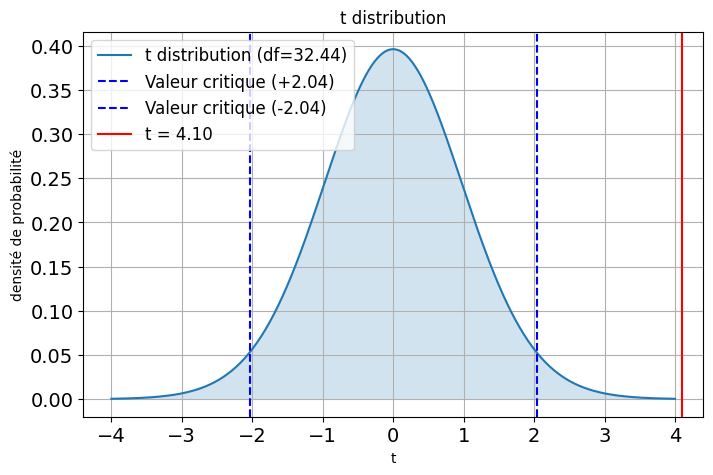

In [19]:
# t test (Welch's t-test)
t, p = stats.ttest_ind(bru["Evaluation"], paris["Evaluation"], equal_var=False)

# Degrees of Freedom (Welch-Satterthwaite approximation)
n1, n2 = len(bru["Evaluation"]), len(paris["Evaluation"])
s1, s2 = np.var(bru["Evaluation"], ddof=1), np.var(paris["Evaluation"], ddof=1)
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))

# x-range of the t-distribution
x = np.linspace(-4, 4, 400)
y = stats.t.pdf(x, df)

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f't distribution (df={df:.2f})')
plt.fill_between(x, y, alpha=0.2)

## Critical values for 5% significance level (two-tailed)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)
plt.axvline(t_crit, color='b', linestyle='--', label=f'Valeur critique (+{t_crit:.2f})')
plt.axvline(-t_crit, color='b', linestyle='--', label=f'Valeur critique (-{t_crit:.2f})')
plt.tick_params(labelsize=14)

## Location of t-value
plt.axvline(t, color='r', linestyle='-', label=f't = {t:.2f}')

## labels, etc.
plt.title("t distribution")
plt.xlabel("t")
plt.ylabel("densité de probabilité")
plt.legend(fontsize=12)
plt.grid(True)
plt.show()